In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe


In [378]:
pd.set_option('display.max_columns', None)

In [379]:
data = pd.read_csv('data/data_eda.csv')
data.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_id,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,500,19,8,13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,500,19,8,13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,voucher,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,500,19,8,13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,credit_card,37.77,b46f1e34512b0f4c74a72398b03ca788,4,500,19,8,13,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,housewares
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,credit_card,37.77,dc90f19c2806f1abba9e72ad3c350073,5,500,19,8,13,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,housewares


In [380]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [381]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_type', 'payment_value', 'review_id', 'review_score',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [382]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_id,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,500,19,8,13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,500,19,8,13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,voucher,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,500,19,8,13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,credit_card,37.77,b46f1e34512b0f4c74a72398b03ca788,4,500,19,8,13,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,credit_card,37.77,dc90f19c2806f1abba9e72ad3c350073,5,500,19,8,13,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,housewares


In [383]:
data.shape

(113207, 29)

In [384]:
data.describe()

,order_item_id,price,freight_value,payment_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,113207.000000,113207.000000,113207.000000,113207.000000,113207.000000,113207.000000,113207.000000,113207.000000,113207.000000,113207.000000,113207.000000
mean,1.195050,119.846143,20.002494,171.554515,4.082530,2106.306041,30.278614,16.597189,23.099667,35086.042135,24524.925296
std,0.687491,181.072195,15.710965,264.183926,1.345878,3765.413228,16.144960,13.437115,11.735506,29867.761718,27648.940912
min,1.000000,0.850000,0.000000,0.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,60.850000,4.000000,300.000000,18.000000,8.000000,15.000000,11310.000000,6429.000000
50%,1.000000,74.900000,16.320000,107.960000,5.000000,700.000000,25.000000,13.000000,20.000000,24315.000000,13660.000000
75%,1.000000,132.990000,21.190000,189.140000,5.000000,1800.000000,38.000000,20.000000,30.000000,58865.000000,28495.000000
max,21.000000,6735.000000,409.680000,13664.080000,5.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.000000


In [385]:
#check out what order(s) have a freight_value, payment_value and product_weight of 0
print(data[data['freight_value']== 0].shape)
print(data[data['payment_value'] == 0].shape)
print(data[data['product_weight_g'] == 0].shape)

(385, 29)
(4, 29)
(8, 29)


Lots of 0 values in freight_value (325) and payment_value has 4 and product_weight has 8. For now we let them in the dataset for analytic purposes. However for machine learning its important to know what to do with these values. Should we erase them or is the impact not that much.

In [386]:
data.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_type                      object
payment_value                    float64
review_id                         object
review_score                       int64
product_weight_g                   int64
product_length_cm                  int64
product_height_cm                  int64
product_width_cm                   int64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state  

missing the previous made datetime columns. make it again

In [387]:
date_columns = ['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date']

data[date_columns] = data[date_columns].apply(pd.to_datetime)


In [388]:
data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_type                             object
payment_value                           float64
review_id                                object
review_score                              int64
product_weight_g                          int64
product_length_cm                         int64
product_height_cm                         int64
product_width_cm                        

In [389]:
#make numeric column data set
num_col = data.select_dtypes(include=('int64', 'float64'))
num_col = num_col.drop(columns=['customer_zip_code_prefix','seller_zip_code_prefix', 'order_item_id', 'review_score'], axis=1)
num_col.columns

Index(['price', 'freight_value', 'payment_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

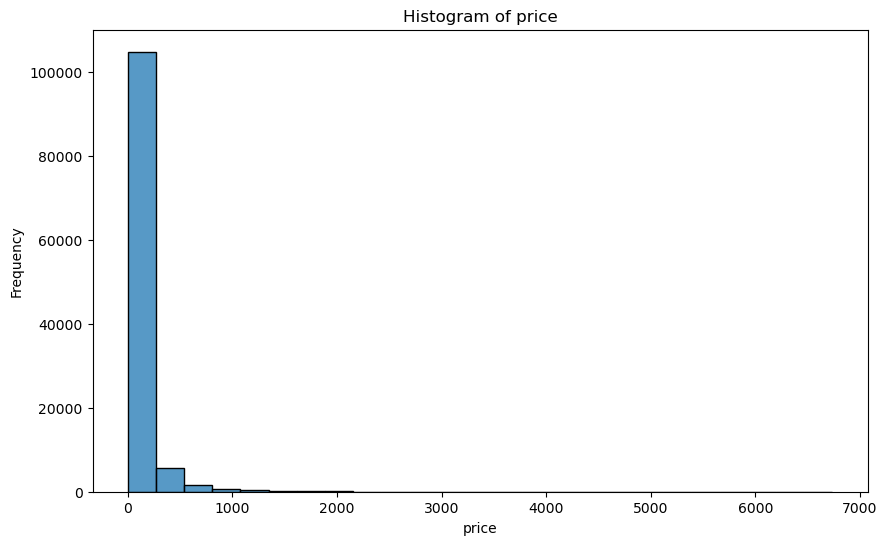

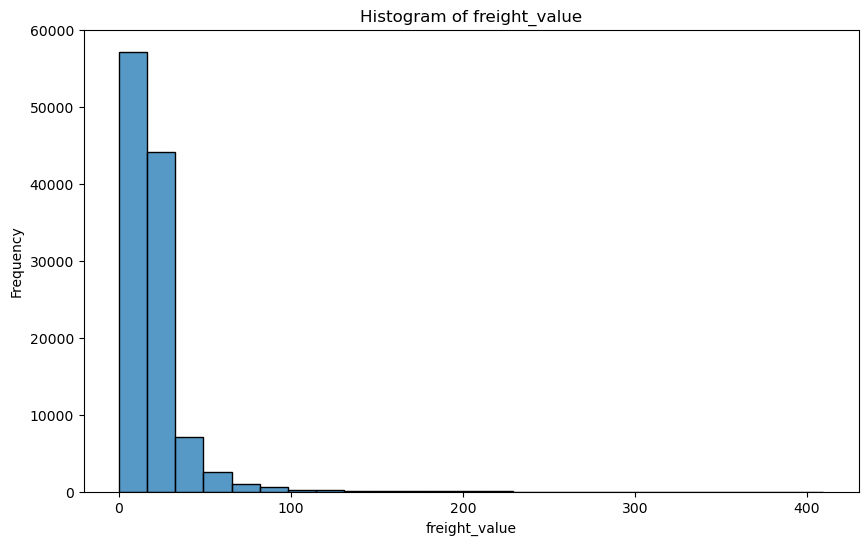

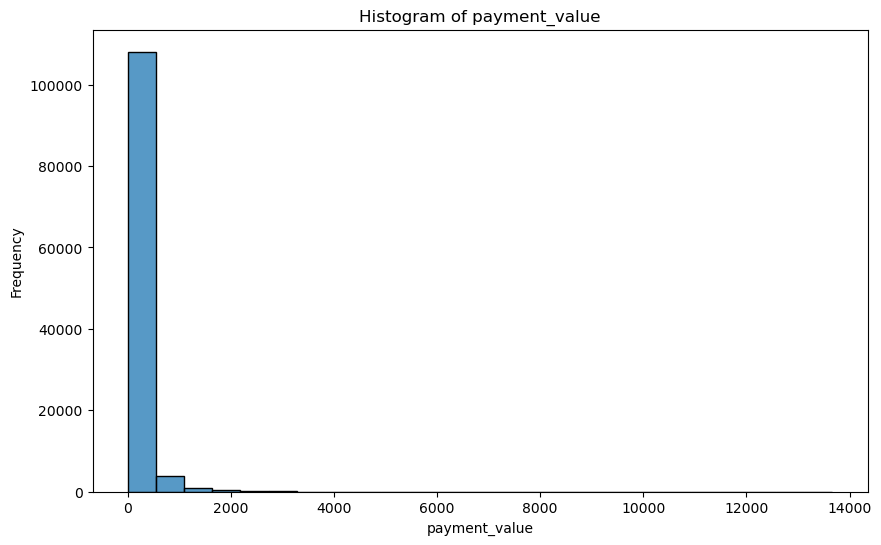

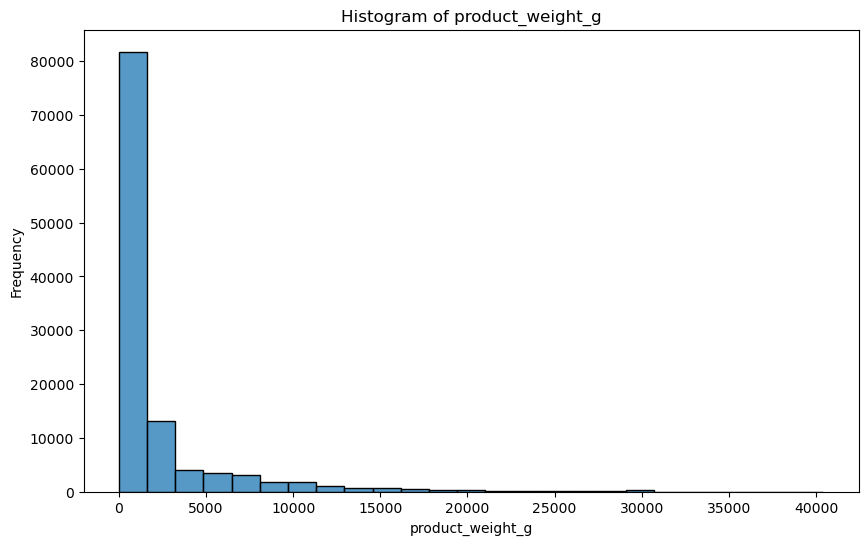

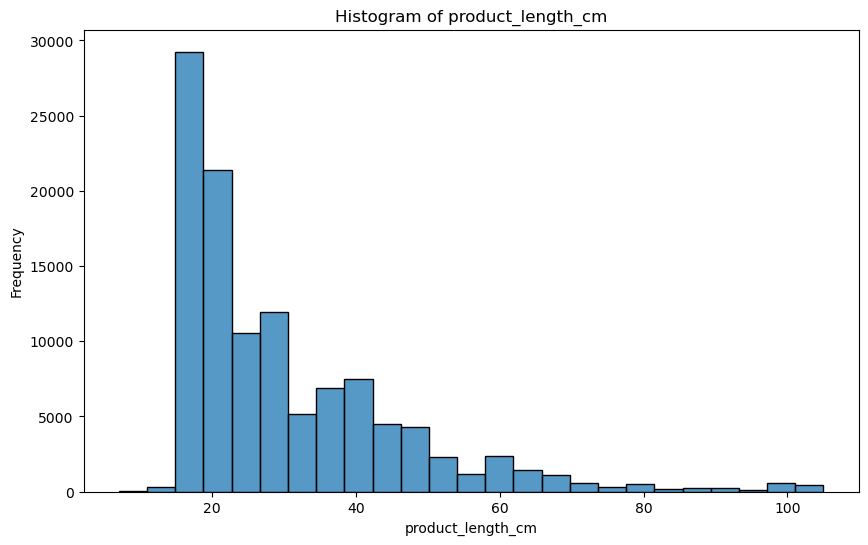

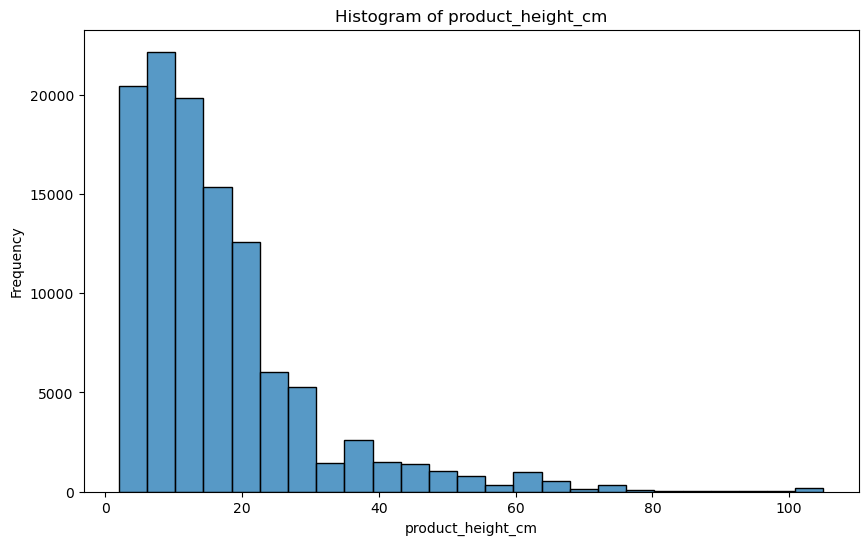

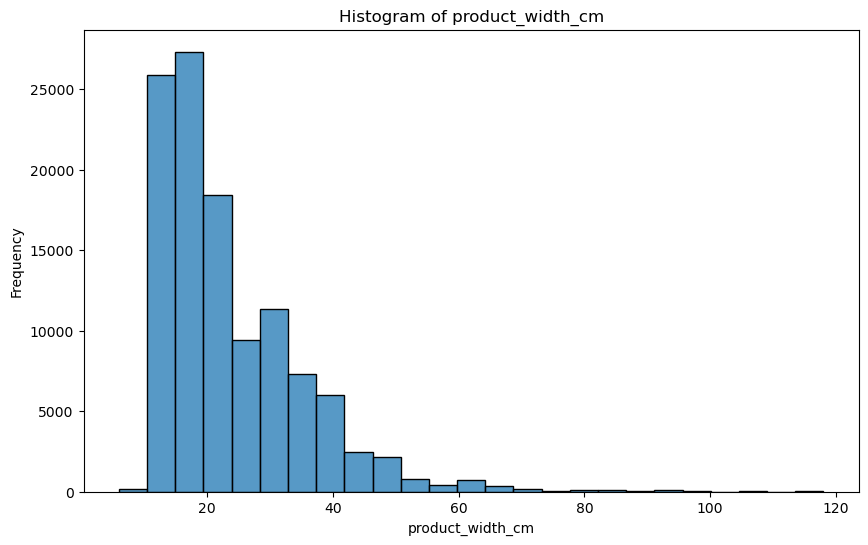

In [390]:
# check distributions of numerical values
for col in num_col.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=num_col, x=col, bins=25)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Most products that are sold are below 250 real and under 2kg. Further most of the products seem kinda small. Lets say under 30 cm height, width and length.

In [494]:
#check outliers
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(num_col)
outliers.dropna()



,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6675,2338.08,174.45,2512.53,30000.0,75.0,58.0,65.0
6676,2338.08,375.28,2713.36,30000.0,75.0,58.0,65.0
6677,2338.08,375.28,2713.36,30000.0,75.0,58.0,65.0
26926,689.90,98.81,788.71,22350.0,80.0,51.0,56.0
26927,689.90,155.11,845.01,22350.0,80.0,51.0,56.0
90925,558.90,64.27,1246.34,30000.0,84.0,52.0,56.0
90926,558.90,64.27,1246.34,30000.0,84.0,52.0,56.0
91153,698.90,120.19,819.09,30000.0,70.0,60.0,70.0
91155,569.90,119.29,689.19,30000.0,70.0,60.0,70.0
91175,415.90,137.13,889.15,30000.0,80.0,60.0,60.0


Outliers dont look that bad. 2338 real is around 430 euro. Some are even duplicates which means these products were bought multiple times. 

In [495]:
#make a object/categorical dataset for analysis (also drop the city columns since they have 4000+ distinct values. 
# Viz will be too cluttered)
bol_col = data.select_dtypes(include='object')
bol_col = bol_col.drop(columns=['order_id', 'customer_id', 'seller_id', 'review_id', 'customer_unique_id', 'product_id', 'customer_city', 'seller_city'	])
bol_col.head()

,order_status,payment_type,customer_state,seller_state,product_category_name_english,purchase_month_year
0,delivered,credit_card,SP,SP,housewares,201710
1,delivered,voucher,SP,SP,housewares,201710
2,delivered,voucher,SP,SP,housewares,201710
3,delivered,credit_card,SP,SP,housewares,201708
4,delivered,credit_card,SP,SP,housewares,201708


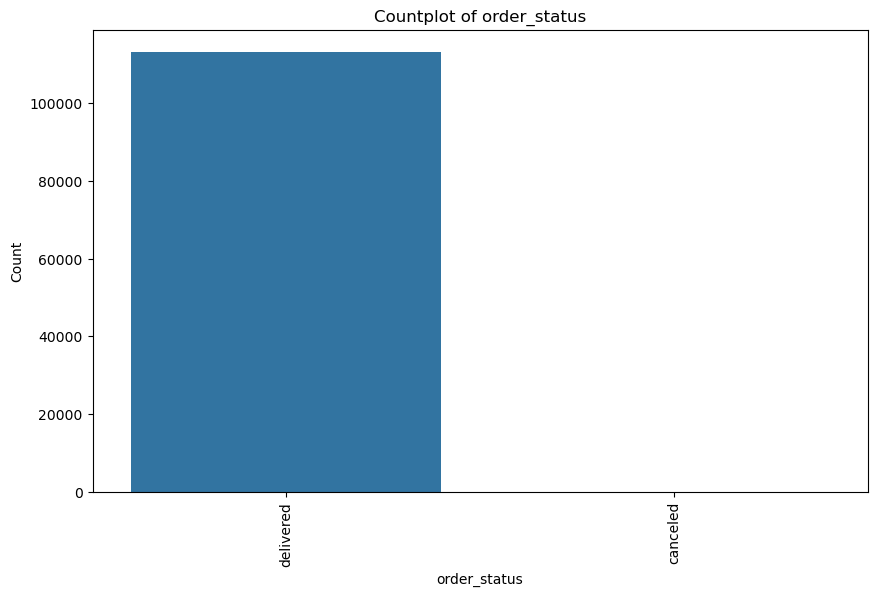

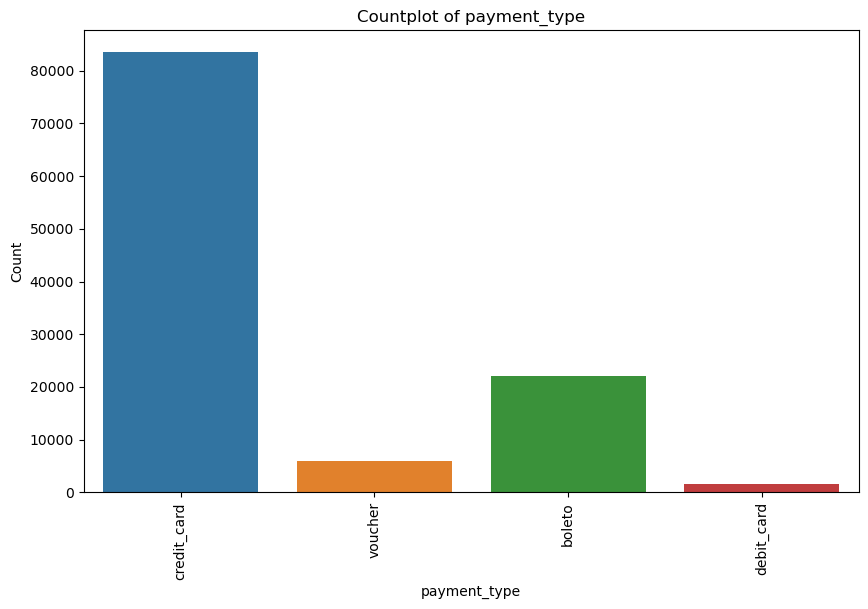

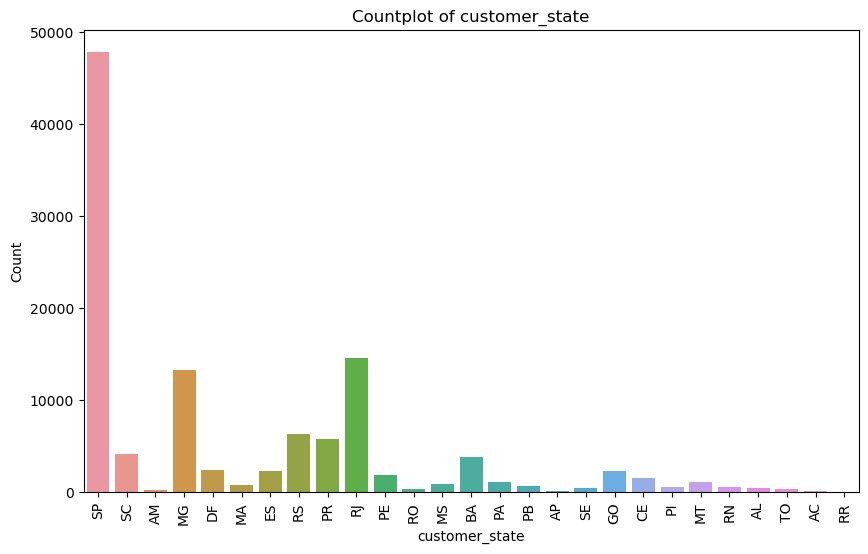

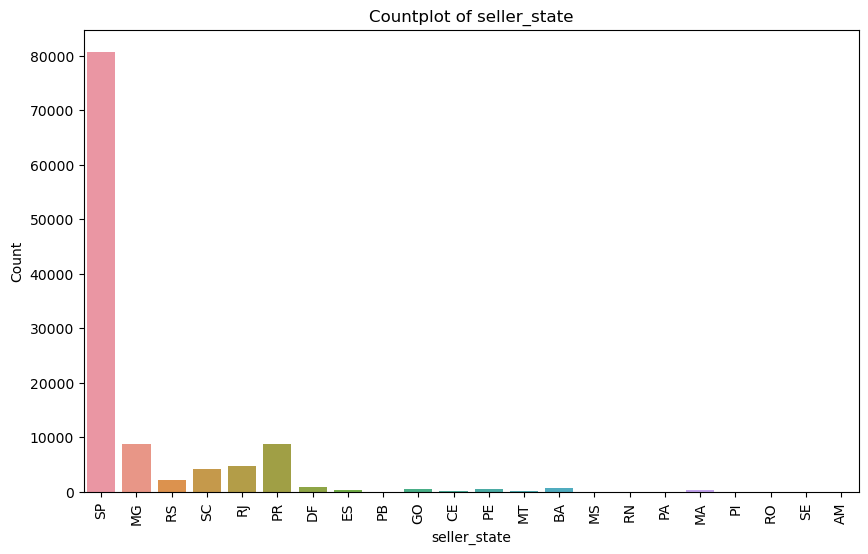

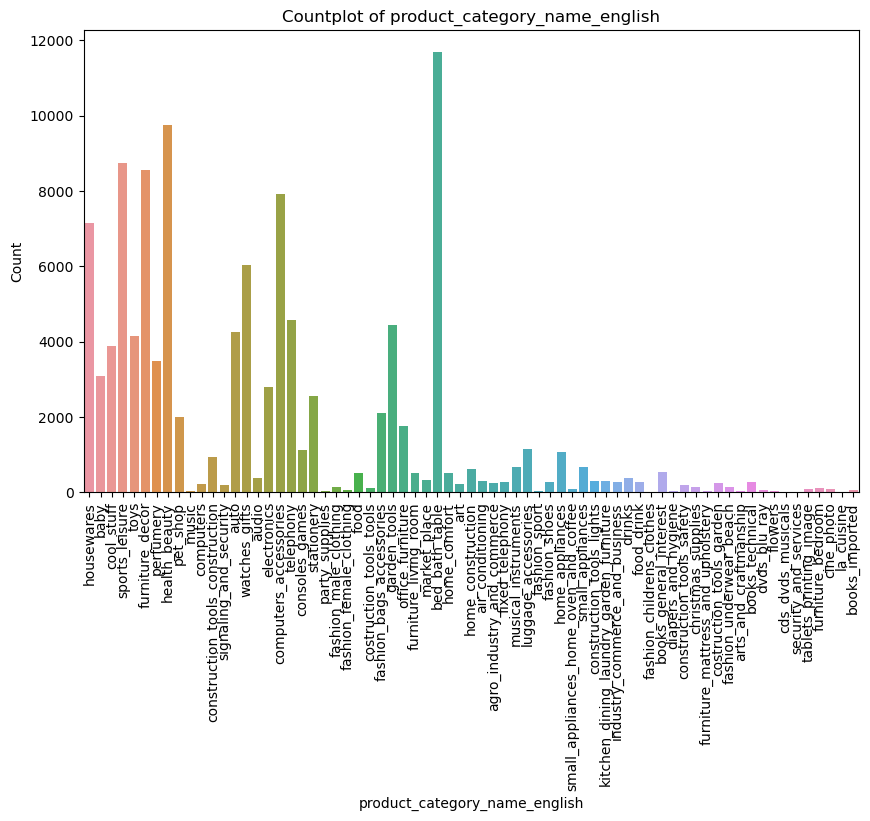

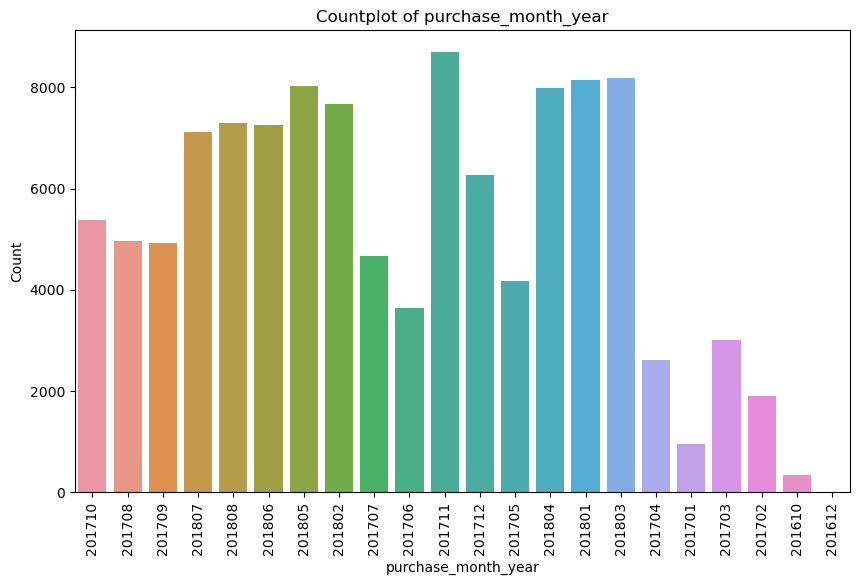

In [496]:
for col in bol_col.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=bol_col, x=col)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


Most customers and sellers are in Sao Paulo and Rio area. And most products are payed with credit card. Last viz is clutterd so lets make it a bit different. It looks like there isnt a big favourite category to buy products. We can only say that bed-bath-table products are the most popular category with 10,3%. And 7 orders are canceled.

In [497]:
category_count = data['product_category_name_english'].value_counts(normalize=True).to_frame()
print(category_count.to_string(max_rows=None))

                                         product_category_name_english
bed_bath_table                                                0.103223
health_beauty                                                 0.086128
sports_leisure                                                0.077179
furniture_decor                                               0.075597
computers_accessories                                         0.070023
housewares                                                    0.063176
watches_gifts                                                 0.053272
telephony                                                     0.040462
garden_tools                                                  0.039331
auto                                                          0.037626
toys                                                          0.036743
cool_stuff                                                    0.034349
perfumery                                                     0.030894
baby  

In [498]:
data['order_status'].value_counts()

delivered    113185
canceled          7
Name: order_status, dtype: int64

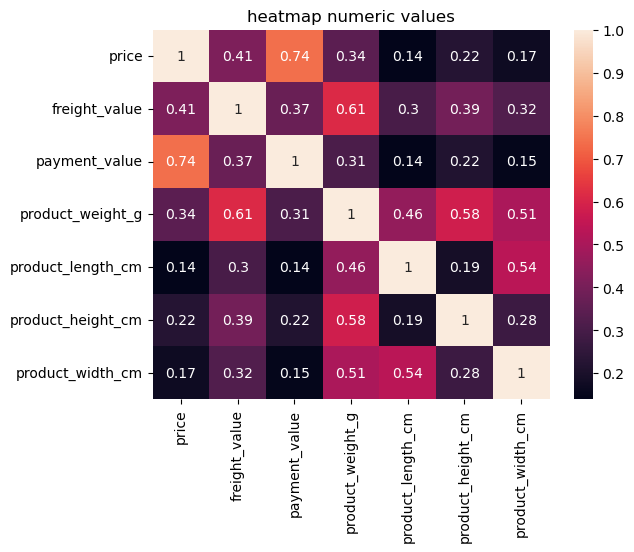

In [499]:
#check heatmap of numeric values. Not too many strong correlations
sns.heatmap(data=num_col.corr(), annot=True)
plt.title('heatmap numeric values')
plt.show()

Some interesting relations. Freight value and price has 0.41. So a higher freight value doesn't necesarry means a higher price. However if Olist includes freight value in their payment value or price this can be a good reason for this correlations. Product weight has a 0.61 correlation which seems a bit weak since you would expect higher freight value with higher product weights. Heavier to load so heavier to transport. Also price doesnt have to increase if the product is bigger (larger length, width etc.). All of these related correlations are weak.
Most of the products are well received. Around 77% has a 4 or higher.

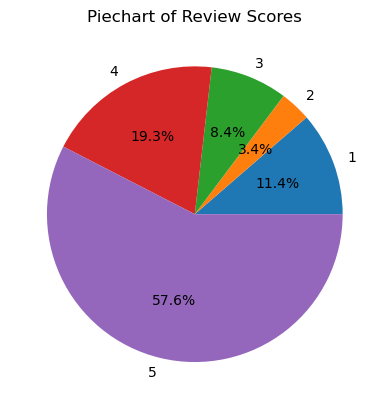

In [500]:
#distribution of review scores
data.groupby('review_score')['review_score'].agg('count').plot.pie(autopct='%1.1f%%')
plt.title('Piechart of Review Scores')
plt.ylabel('')
plt.show()

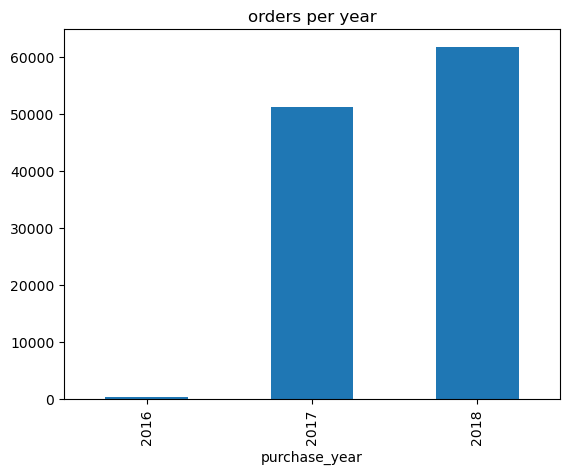

In [501]:
#unique customers per year. The amount is rising
data['purchase_year'] = data['order_purchase_timestamp'].dt.year
data.groupby('purchase_year')['order_id'].agg('count').plot(kind='bar')
plt.title('orders per year')
plt.show()

In [502]:
data['purchase_month_year'] = data['order_purchase_timestamp'].dt.strftime('%Y%m')
data['purchase_month_year']

0         201710
1         201710
2         201710
3         201708
4         201708
           ...  
113202    201807
113203    201807
113204    201805
113205    201806
113206    201808
Name: purchase_month_year, Length: 113192, dtype: object

Distribution of the amount of orders per month per year. A big increase in November 2017 and it stayed relatively stable from there with a small dip in December 2018. This gives us a reason why the amount of orders are the highest in 2018. Dip in December 2016 is due to having getting one order.

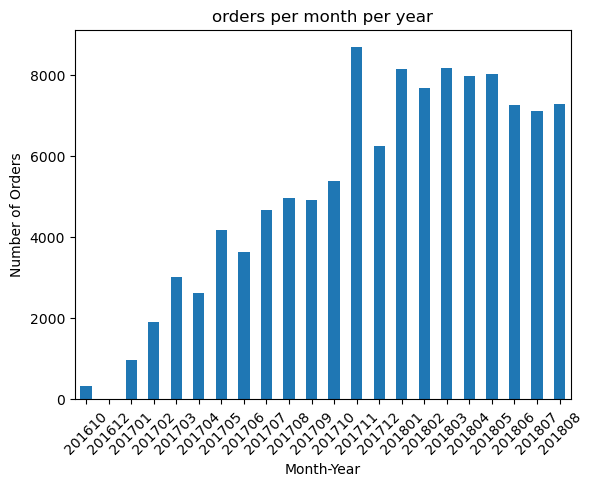

In [503]:
data.groupby('purchase_month_year')['order_id'].agg('count').plot(kind='bar')
plt.title('orders per month per year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [504]:
data[data['purchase_month_year']=='201612']

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_id,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,purchase_year,purchase_month_year,on_time,not_on_time
83869,bd50a7fe9fd97ea4b7663031a319e150,0975c3cf2e418ebfa5d1191a2dffd59d,delivered,2016-12-23 23:16:47,2016-12-27 06:14:27,2016-12-28 15:54:44,2017-01-19,1,f5d8f4fbc70ca2a0038b9a0010ed5cb0,48efc9d94a9834137efd9ea76b065a38,2016-12-27 23:16:47,10.9,8.72,credit_card,19.62,19bede7c5c1b2ef2b85f4ba698c1cf54,5,200,16,2,11,f7b981e8a280e455ac3cbe0d5d171bd1,80030,curitiba,PR,81130,curitiba,PR,fashion_bags_accessories,2016,201612,1,0


No increase in price per order. It stayed relatively the same in all the years. It would be a good insentive to try to get the people pay more. Maybe look into cross sell or upselling products.

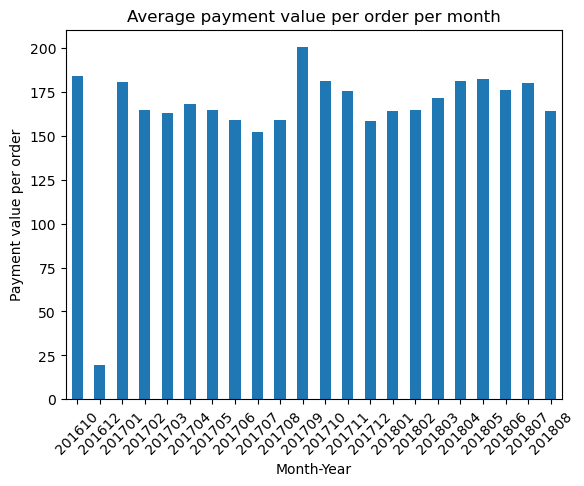

In [505]:
data.groupby('purchase_month_year')['payment_value'].agg('mean').plot(kind='bar')
plt.title('Average payment value per order per month')
plt.xlabel('Month-Year')
plt.ylabel('Payment value per order')
plt.xticks(rotation=45)
plt.show()

In [506]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_type', 'payment_value', 'review_id', 'review_score',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english',
       'purchase_year', 'purchase_month_year', 'on_time', 'not_on_time'],
      dtype='object')

Quete a lot of orders were delivered. Around 8714 orders are delivered too late. That is around 7.7% of total deliveries that were too late.

In [507]:
earlier_count = (data['order_delivered_customer_date'] < data['order_estimated_delivery_date']).sum()
late_count = (data['order_delivered_customer_date'] > data['order_estimated_delivery_date']).sum()

print(f"The number of orders where the carrier delivery date is earlier than the customer delivery date: {earlier_count}")
print(f"The number of orders where the carrier delivery date is later than the customer delivery date: {late_count}")


The number of orders where the carrier delivery date is earlier than the customer delivery date: 104479
The number of orders where the carrier delivery date is later than the customer delivery date: 8713


In [508]:
data['on_time'] = np.where(data['order_delivered_customer_date']<data['order_estimated_delivery_date'],1,0)
data['not_on_time'] = np.where(data['order_delivered_customer_date']>data['order_estimated_delivery_date'],1,0)

For a large part the orders are on time. There is only an increase between 02-2018 and 03-2018. However this was also a time where the amount of order increased. Maybe the company wansn't prepared for the increase in orders or maybe due to the rise of orders the rate of on-time and too-late order is actually the same.

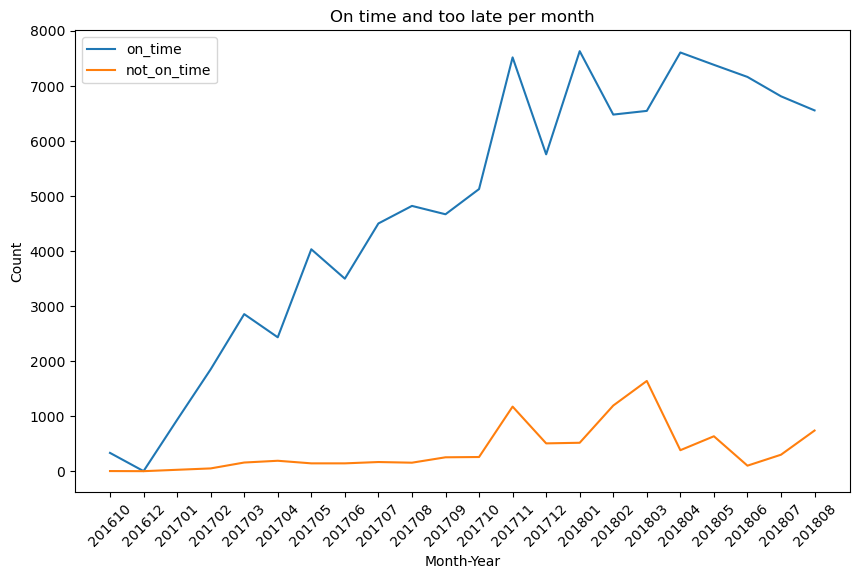

In [509]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.groupby('purchase_month_year').sum().reset_index(), x='purchase_month_year', y='on_time', label='on_time')
sns.lineplot(data=data.groupby('purchase_month_year').sum().reset_index(), x='purchase_month_year', y='not_on_time', label='not_on_time')
plt.title('On time and too late per month')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


The orders that were on time are stable above 80%. So at least 4/5 packages arrives on time. Like I said before 02-2018 and 03-2018 were big drops. But the company catched up fast in 04-2018.

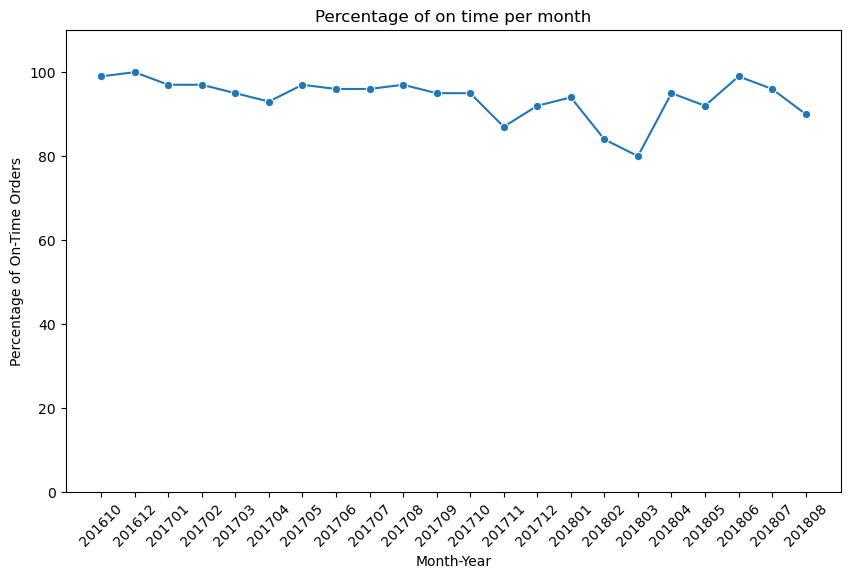

In [510]:
# Calculate the percentage of on-time orders per month
percentage_on_time = round((data.groupby('purchase_month_year')['on_time'].sum().values) / (data.groupby('purchase_month_year')['order_id'].count()), 2) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(x=data['purchase_month_year'].sort_values().unique(), y=percentage_on_time, marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Percentage of On-Time Orders')
plt.title('Percentage of on time per month')
plt.xticks(rotation=45)
plt.ylim(0, 110)
plt.show()


This concludes the EDA of this dataset. Other projects can be a creating a dashboard, machine learning (customer segmentation or an NLP project) and feature engineering.